In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
movies=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\movies.csv")

ratings=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\ratings.csv")

tags=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\tags.csv")

links=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\links.csv")

In [3]:
df=movies.merge(ratings,how='right')

df1=movies.merge(tags,how='right')

In [4]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931
...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091
100833,168250,Get Out (2017),Horror,610,5.0,1494273047
100834,168252,Logan (2017),Action|Sci-Fi,610,5.0,1493846352


# What is the shape of "movies.csv"?


In [25]:
movies.shape

(9742, 3)

# What is the shape of "ratings.csv"?


In [26]:
ratings.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?


In [29]:
df['userId'].nunique()

610

# Which movie has recieved maximum number of user ratings?


In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().head(1)

,title,rating
0,Forrest Gump (1994),329


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [10]:

df1[df1["title"]=="Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
815,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
816,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1646,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
2794,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
2795,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [11]:
df[df["title"]=="Terminator 2: Judgment Day (1991)"]["rating"].mean()

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<AxesSubplot:xlabel='rating', ylabel='Density'>

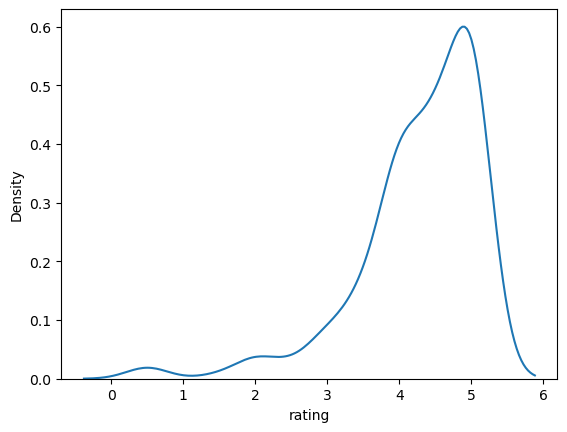

In [12]:
Fight_rat = df[df["title"]=="Fight Club (1999)"]["rating"]
sns.kdeplot(Fight_rat)

 # <u> 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. </u>

In [ ]:
mergedmov_rat= pd.merge( movie,rating, on = 'movieId')
mergedmov_rat["rating"].count()

In [18]:
grouped_ratings = df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings

movieId rating          
              count      mean
0          1    215  3.920930
1          2    110  3.431818
2          3     52  3.259615
3          4      7  2.357143
4          5     49  3.071429
...      ...    ...       ...
9719  193581      1  4.000000
9720  193583      1  3.500000
9721  193585      1  3.500000
9722  193587      1  3.500000
9723  193609      1  4.000000

[9724 rows x 3 columns]

In [19]:
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# <U> 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.</u>

In [21]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# <u> 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).</u>

In [22]:
filtered_movies = merged_df[merged_df['rating_count'] > 50]

In [23]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Which movie is the most popular based on  average user ratings? 


In [24]:
filtered_movies.sort_values(by="rating_mean",ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [25]:
filtered_movies.sort_values(by="rating_count",ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [26]:
filtered_movies[filtered_movies['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547
